<a href="https://colab.research.google.com/github/silvanat/exercicios_machine_learning/blob/main/Calculo_Metricas_Avaliacao_Matriz_de_Confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix
)
import itertools


In [6]:
# Dados fictícios para exemplo de classificação
y_true_clf = [0, 1, 1, 0, 1, 0, 1]
y_pred_clf  = [0, 1, 0, 0, 1, 1, 1]
y_scores_clf = [0.1, 0.9, 0.4, 0.3, 0.8, 0.7, 0.9]  # Pontuações preditivas
classes = [0, 1]

In [9]:
acuracia = accuracy_score(y_true_clf, y_pred_clf )
print(f"Acuracia: {acuracia}")

Acuracia: 0.7142857142857143


In [11]:
precisao = precision_score(y_true_clf, y_pred_clf, average='binary')
print(f"Precisão: {precisao}")

Precisão: 0.75


In [40]:
def specificity_score(y_true_clf, y_pred_clf):
    cm = confusion_matrix(y_true_clf, y_pred_clf)
    tn = cm[0, 0]
    fp = cm[0, 1]
    especificidade = tn / (tn + fp) if (tn + fp) > 0 else 0
    return especificidade

In [41]:
especificidade = specificity_score(y_true_clf, y_pred_clf)
print(f"Especificidade: {especificidade}")

Especificidade: 0.6666666666666666


In [19]:
f_score =  f1_score(y_true_clf, y_pred_clf, average='binary')
print(f"F Score: {f_score}")


F Score: 0.75


In [21]:
sensibilidade = recall_score(y_true_clf, y_pred_clf, average='binary')
print(f"Sensibilidade: {sensibilidade}")

Sensibilidade: 0.75


In [22]:
#usando a biblioteca pronta para criar a matriz de confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_true_clf, y_pred_clf))


Matriz de Confusão:
[[2 1]
 [1 3]]


In [29]:
#criando a matriz de confusão manualmente.
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

conf = get_confusion_matrix(y_true_clf, y_pred_clf)
conf

array([[2, 1],
       [1, 3]])

Text(0.5, 23.52222222222222, 'Predicted label')

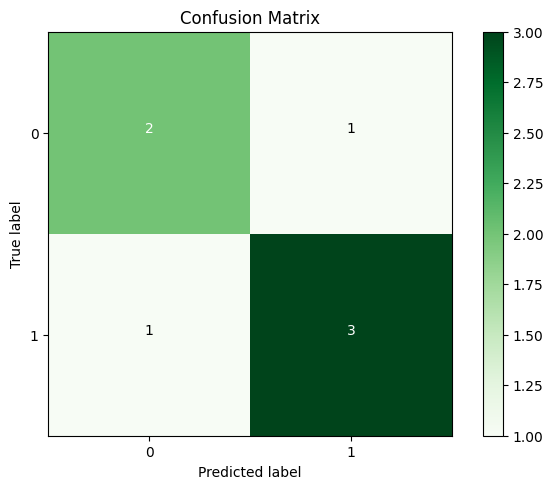

In [32]:
# plot matriz confusão
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

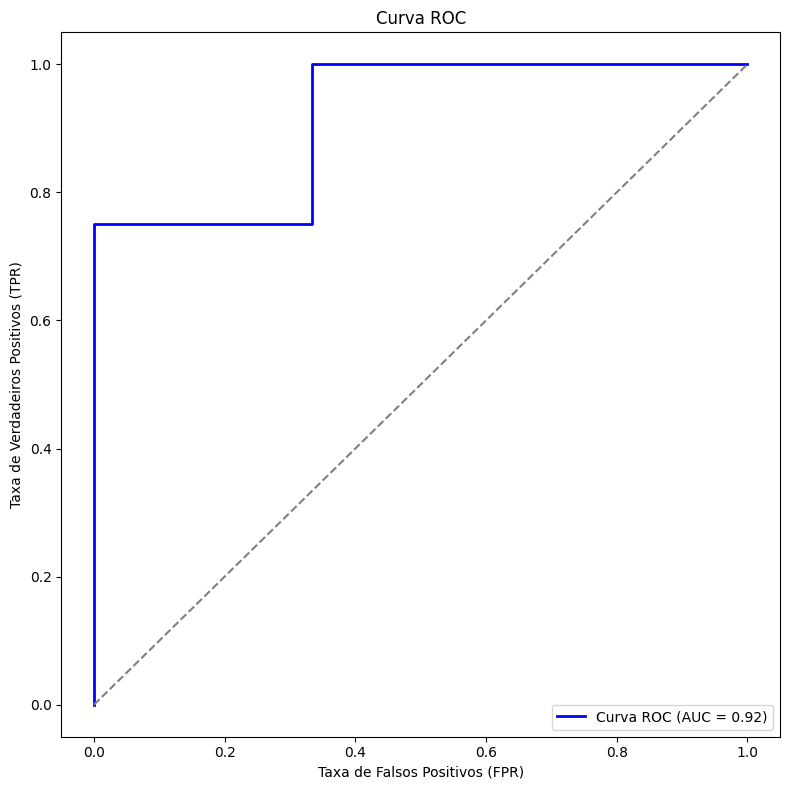

In [34]:
# plot curva roc
def plot_roc_curve(y_true, y_scores):

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Curva ROC')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plot_roc_curve(y_true_clf, y_scores_clf)